# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda:0')

In [3]:
dataset = DataLoader(data_dir="../DDI_Corpus", device=device)

dataframes are ready


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-MedLine.d203.s16,156,0,5,test
1,DDI-MedLine.d203.s16,157,7,13,test
2,DDI-MedLine.d203.s16,158,15,17,test
3,DDI-MedLine.d203.s16,159,19,24,test
4,DDI-MedLine.d203.s16,15,26,27,test


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-MedLine.d203.s0,1,54,68
1,DDI-MedLine.d203.s1,1,129,143
2,DDI-MedLine.d203.s5,1,68,82
3,DDI-MedLine.d203.s6,1,0,8
4,DDI-MedLine.d203.s6,1,10,18


In [7]:
dataset.vocab[:15]

['potential',
 'underuse',
 'overuse',
 'and',
 'inappropriate',
 'use',
 'of',
 'antidepressants',
 'in',
 'older',
 'veteran',
 'nursing',
 'home',
 'residents.\r',
 'to']

In [8]:
dataset.id2ner

{1: 'group', 2: 'drug_n', 3: 'drug', 4: 'brand'}

In [9]:
dataset.max_sample_length

94

In [10]:
dataset.get_random_sample()

/home/gusklezju@GU.GU.SE/machine_learning/lt2316-h20-aa/aa/data_loading.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'interactions for DRUG:vitamin DRUG:b1 (thiamine) loop DRUG:diuretics DRUG:oral contraceptives stavudine tricyclic GROUP:antidepressants'

### Data Exploration

split df
got y


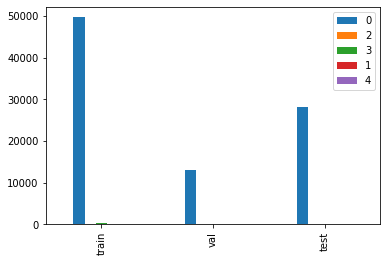

In [11]:
dataset.plot_split_ner_distribution()

### Labels

In [12]:
train_y, val_y, test_y = check_output(dataset.get_y())

split df
got y


## Extracting Features

In [4]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        id2w = dataset.id2word
                                                       ))

NameError: name 'device' is not defined

## Bonus Part: Explore Some more

In [ ]:
#uncomment the code below if you want to do bonus part

In [4]:
#dataset.plot_ner_per_sample_distribution()

Counter({'DDI-DrugBank.d782.s0': 94, 'DDI-DrugBank.d184.s0': 87, 'DDI-DrugBank.d643.s0': 81, 'DDI-DrugBank.d484.s0': 65, 'DDI-DrugBank.d775.s13': 64, 'DDI-DrugBank.d342.s0': 63, 'DDI-DrugBank.d168.s0': 63, 'DDI-DrugBank.d62.s0': 62, 'DDI-DrugBank.d192.s0': 62, 'DDI-DrugBank.d760.s0': 59, 'DDI-DrugBank.d537.s0': 58, 'DDI-DrugBank.d234.s12': 54, 'DDI-DrugBank.d229.s3': 54, 'DDI-DrugBank.d724.s1': 53, 'DDI-DrugBank.d38.s4': 52, 'DDI-DrugBank.d627.s4': 50, 'DDI-DrugBank.d381.s2': 50, 'DDI-DrugBank.d70.s29': 50, 'DDI-DrugBank.d242.s1': 50, 'DDI-MedLine.d88.s5': 48, 'DDI-MedLine.d95.s9': 48, 'DDI-DrugBank.d140.s25': 48, 'DDI-DrugBank.d382.s43': 48, 'DDI-DrugBank.d86.s1': 48, 'DDI-MedLine.d83.s19': 47, 'DDI-DrugBank.d401.s0': 47, 'DDI-DrugBank.d557.s1': 46, 'DDI-MedLine.d118.s3': 45, 'DDI-DrugBank.d18.s1': 45, 'DDI-DrugBank.d332.s2': 45, 'DDI-DrugBank.d72.s4': 45, 'DDI-DrugBank.d333.s7': 43, 'DDI-DrugBank.d211.s6': 43, 'DDI-DrugBank.d566.s5': 43, 'DDI-DrugBank.d376.s0': 43, 'DDI-MedLine.d26.s

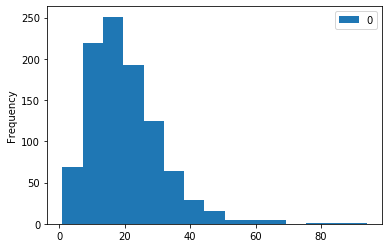

In [4]:
dataset.plot_sample_length_distribution()

In [1]:
#dataset.plot_ner_cooccurence_venndiagram()